In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("..")
sys.path.append(os.getcwd())

%matplotlib inline
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


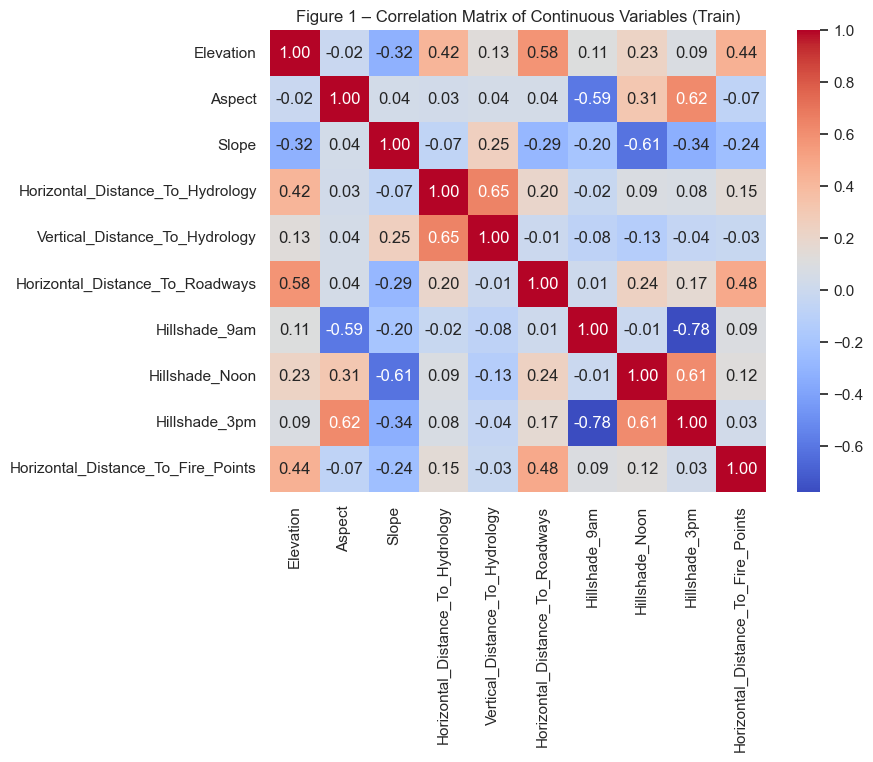

In [3]:
cols = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
corr_continuous = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_continuous, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 1 – Correlation Matrix of Continuous Variables (Train)")
plt.show()



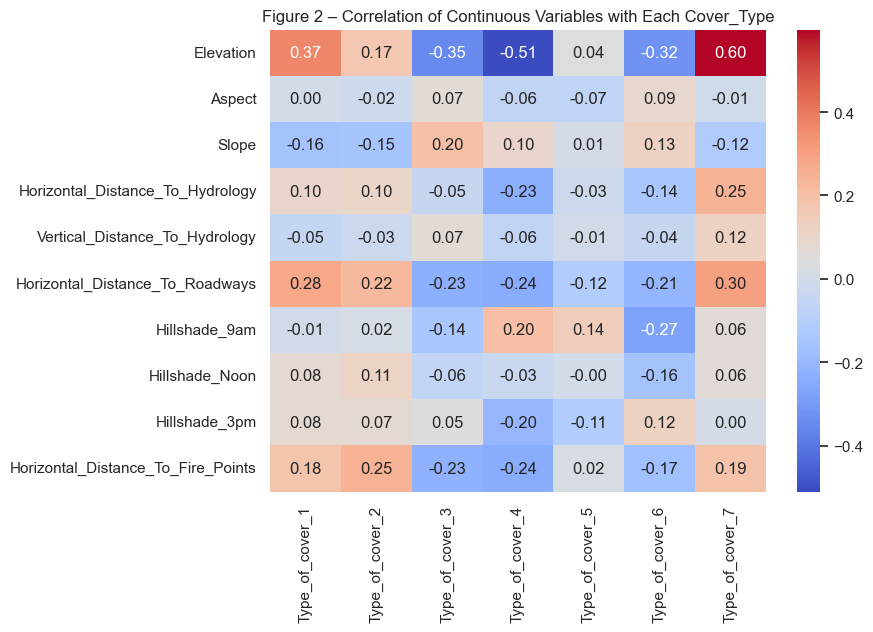

In [4]:
cover_dummies = pd.get_dummies(df["Cover_Type"], prefix="Type_of_cover")

df_cont_vs_cover = pd.concat([df[cols], cover_dummies], axis=1)
corr_cont_vs_cover = df_cont_vs_cover.corr()

cover_dummy_cols = cover_dummies.columns.tolist()
subset_cols = cols + cover_dummy_cols
corr_subset = corr_cont_vs_cover.loc[cols, cover_dummy_cols]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 2 – Correlation of Continuous Variables with Each Cover_Type")
plt.show()


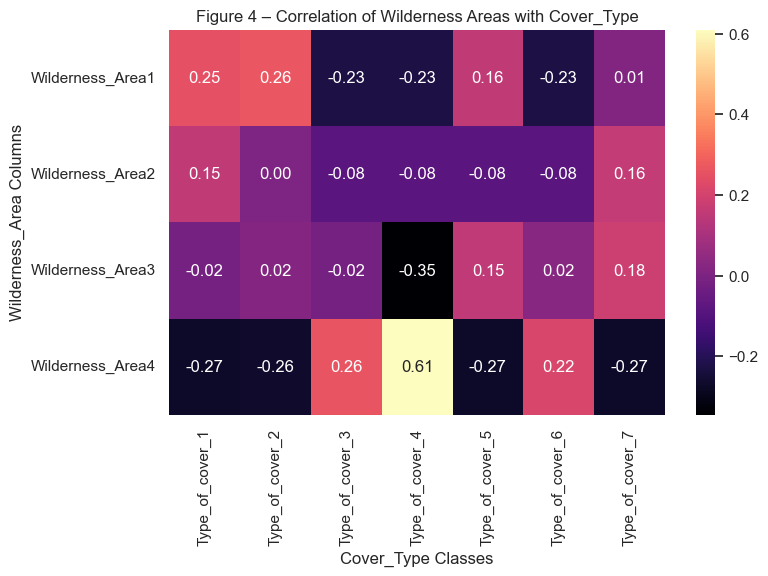

In [5]:
wilderness_cols = [col for col in df.columns if "Wilderness_Area" in col]

df_wild_vs_cover = pd.concat([df[wilderness_cols], cover_dummies], axis=1)
corr_wild_vs_cover = df_wild_vs_cover.corr()

corr_wild_subset = corr_wild_vs_cover.loc[wilderness_cols, cover_dummy_cols]

plt.figure(figsize=(8, 5))
sns.heatmap(corr_wild_subset, annot=True, cmap="magma", fmt=".2f")
plt.title("Figure 4 – Correlation of Wilderness Areas with Cover_Type")
plt.xlabel("Cover_Type Classes")
plt.ylabel("Wilderness_Area Columns")
plt.show()
